In [32]:
import cv2
import os

In [33]:
import numpy as np 
import tensorflow as tf 
import pandas as pd
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
from tensorflow  import keras

In [34]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import numpy as np 
import tensorflow as tf 
import pandas as pd
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
from tensorflow  import keras

In [36]:
train = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/data1/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256,256))
 

test = keras.preprocessing.image_dataset_from_directory(
     '/content/drive/My Drive/data1/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256,256))
validation= keras.preprocessing.image_dataset_from_directory(
     '/content/drive/My Drive/data1/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256,256))


Found 2258 files belonging to 5 classes.
Found 589 files belonging to 5 classes.
Found 122 files belonging to 5 classes.


In [37]:
def squeeze_excite_block(filters,input):                      
    se = tf.keras.layers.GlobalAveragePooling2D()(input)
    se = tf.keras.layers.Reshape((1, filters))(se) 
    se = tf.keras.layers.Dense(filters//16, activation='relu')(se)
    se = tf.keras.layers.Dense(filters, activation='sigmoid')(se)
    se = tf.keras.layers.multiply([input, se])
    return se
    

In [38]:

def make_model():
        s = tf.keras.Input(((256, 256,3))) 
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(s)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)

        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)        


        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = squeeze_excite_block(32,x)
        x = tf.keras.layers.AveragePooling2D(2)(x)


        x = tf.keras.layers.concatenate([tf.keras.layers.GlobalMaxPooling2D()(x),
                                         tf.keras.layers.GlobalAveragePooling2D()(x)])

        x = tf.keras.layers.Dense(5,activation='softmax',use_bias=False,
                                  kernel_regularizer=tf.keras.regularizers.l1(0.00025))(x)
        return tf.keras.Model(inputs=s, outputs=x)




In [39]:
from tensorflow.keras import optimizers
model=make_model()                
model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 256, 256, 32  896         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_13 (Conv2D)             (None, 256, 256, 32  9248        ['conv2d_12[0][0]']              
                                )                                                           

In [50]:
model.fit(train,validation_data=validation,epochs=32) 

Epoch 1/32
71/71 [==============================] - 32s 447ms/step - loss: 0.0523 - accuracy: 0.9863 - val_loss: 1.6208 - val_accuracy: 0.6885
Epoch 2/32
71/71 [==============================] - 33s 454ms/step - loss: 0.0282 - accuracy: 0.9942 - val_loss: 0.1616 - val_accuracy: 0.9508
Epoch 3/32
71/71 [==============================] - 32s 448ms/step - loss: 0.0808 - accuracy: 0.9734 - val_loss: 2.2680 - val_accuracy: 0.5656
Epoch 4/32
71/71 [==============================] - 32s 450ms/step - loss: 0.0348 - accuracy: 0.9942 - val_loss: 0.6045 - val_accuracy: 0.7869
Epoch 5/32
71/71 [==============================] - 32s 450ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.1177 - val_accuracy: 0.9590
Epoch 6/32
71/71 [==============================] - 32s 450ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0891 - val_accuracy: 0.9590
Epoch 7/32
71/71 [==============================] - 32s 450ms/step - loss: 0.0143 - accuracy: 0.9978 - val_loss: 0.2657 - val_accuracy: 0.9016

In [51]:
model.evaluate(test)


19/19 [==============================] - 2s 93ms/step - loss: 0.0472 - accuracy: 0.9847


[0.04720328003168106, 0.9847198724746704]

In [52]:
y_train = np.concatenate([y for x, y in train], axis=0)
y_train.shape

(2258, 5)

In [53]:
Result=model.predict(train) 

71/71 [==============================] - 8s 100ms/step


In [54]:
Result.shape

(2258, 5)

In [55]:
from sklearn.metrics import confusion_matrix,classification_report

true_classes=y_train
y_train_new=np.argmax(y_train,axis=1)
Result_new=np.argmax(Result,axis=1)
print('Confusion Matrix')
cm=confusion_matrix(y_train_new,Result_new)
cm

Confusion Matrix


array([[ 16,  32,  37,  25,  40],
       [ 28, 142, 119, 103, 154],
       [ 40, 131, 135, 120, 128],
       [ 36,  97, 119,  98, 107],
       [ 30, 144, 144, 111, 122]])

In [56]:
train.class_names

['2S1', 'A64', 'BRDM_2', 'SLICY', 'ZSU_23_4']

In [57]:
def plot_confusion_matrix(cm, classes, normalize=False, figsize=(12, 12), title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        annot = "%.2f" % cm[i, j] if cm[i, j] > 0 else "" 
        plt.text(j, i, annot, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [58]:
import itertools

[[0.10666667 0.21333333 0.24666667 0.16666667 0.26666667]
 [0.05128205 0.26007326 0.21794872 0.18864469 0.28205128]
 [0.07220217 0.23646209 0.24368231 0.2166065  0.23104693]
 [0.07877462 0.21225383 0.26039387 0.21444201 0.23413567]
 [0.05444646 0.26134301 0.26134301 0.20145191 0.22141561]]


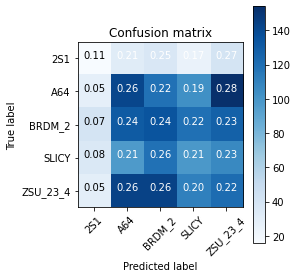

In [59]:
plot_confusion_matrix(cm, train.class_names, normalize=True, figsize=(4, 4))
